In [5]:
import re,string
import csv
import string
import numpy as np
import preprocessor as p
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv('data_final_revisi_seribu_pre.csv', sep=';')
print(data)

                                                  text category
0    selamat kerja kabinet jokowi maruf kerja lurus...  positif
1    selamat nadiem anwar makarim menteri didik bud...  positif
2    pasca lantik kabinet indonesia maju jilid ii p...  negatif
3    visi misi menteri visi misi presiden wakil pre...  positif
4    tenang jokowi pilih menteri bukan asal yakin p...  positif
5     jadi hilang rasa kalo bukan buk sus jadi menteri  negatif
6                                menteri rasa presiden  positif
7    banyak kejut sesuai harap selamat buat bapak p...  positif
8    masalah sama sekali bu ibu sukses bikin standa...  positif
9    ibu pilih jajar kabinet jokowi maruf sungguh s...  positif
10   wahai wakil rakyat menteri baru juang kaum mis...  positif
11       rakyat hibur segala bantuann presiden menteri  positif
12   edy prabowo jadi tri kkp mudah bukan politik d...  positif
13   selamat pak nadiem makarim jadi menteri didik ...  positif
14                              gilasih 

In [7]:
data = data.copy()
data['category_id'] = data['category'].factorize()[0]+1
category_id = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_id[['category_id', 'category']].values)
print(id_to_category)
#print(data)
data.groupby('category').size()

{1: 'positif', 2: 'negatif'}


category
negatif    390
positif    610
dtype: int64

In [8]:
# TFIDF Setting
tfidf = TfidfVectorizer(sublinear_tf=False, min_df=1, norm='l2', encoding='utf-8', ngram_range=(1, 1))

# TFIDF
features = tfidf.fit_transform(data['text'].values.astype('U')).toarray()
labels = data.category_id

# Print hasil TFIDF
# featuresName = tfidf.get_feature_names()
# indexTitle = [n for n in data['text']]
# rows, cols = features.nonzero()
    
# for row, col in zip(rows, cols):
#     print("Doc",row, "TFIDF", (featuresName[col], indexTitle[row]), features[row, col])
# print(features.shape)
# print(len(features))

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 32

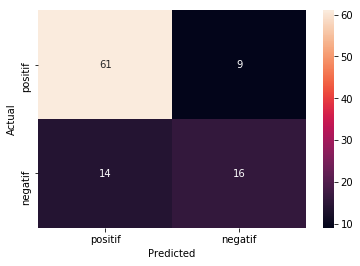

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.87      0.84        70
    negatif       0.64      0.53      0.58        30

avg / total       0.76      0.77      0.76       100

Akurasi Model 77.0 %
##########
Fold  2
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 2

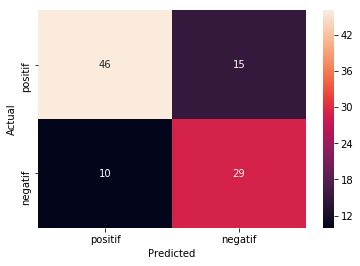

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.75      0.79        61
    negatif       0.66      0.74      0.70        39

avg / total       0.76      0.75      0.75       100

Akurasi Model 75.0 %
##########
Fold  3
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

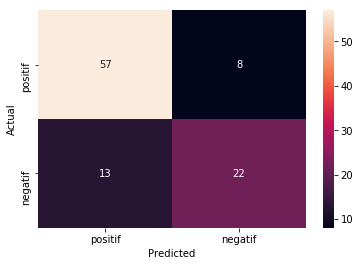

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.88      0.84        65
    negatif       0.73      0.63      0.68        35

avg / total       0.79      0.79      0.79       100

Akurasi Model 79.0 %
##########
Fold  4
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

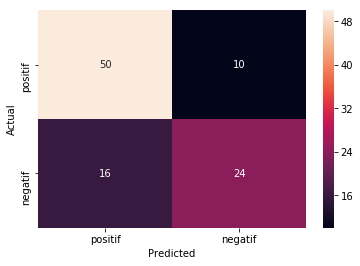

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.76      0.83      0.79        60
    negatif       0.71      0.60      0.65        40

avg / total       0.74      0.74      0.74       100

Akurasi Model 74.0 %
##########
Fold  5
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

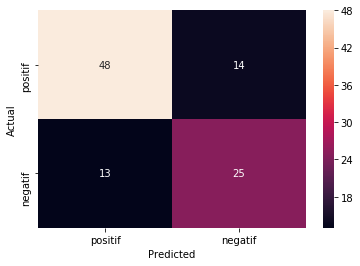

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.79      0.77      0.78        62
    negatif       0.64      0.66      0.65        38

avg / total       0.73      0.73      0.73       100

Akurasi Model 73.0 %
##########
Fold  6
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

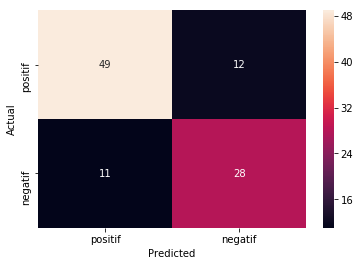

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.80      0.81        61
    negatif       0.70      0.72      0.71        39

avg / total       0.77      0.77      0.77       100

Akurasi Model 77.0 %
##########
Fold  7
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

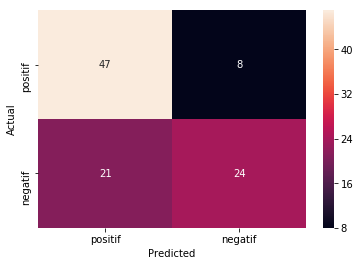

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.69      0.85      0.76        55
    negatif       0.75      0.53      0.62        45

avg / total       0.72      0.71      0.70       100

Akurasi Model 71.0 %
##########
Fold  8
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

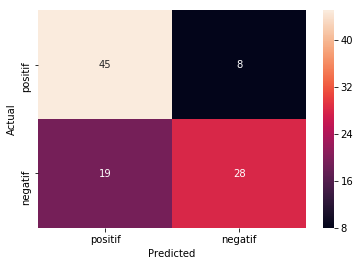

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.70      0.85      0.77        53
    negatif       0.78      0.60      0.67        47

avg / total       0.74      0.73      0.72       100

Akurasi Model 73.0 %
##########
Fold  9
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

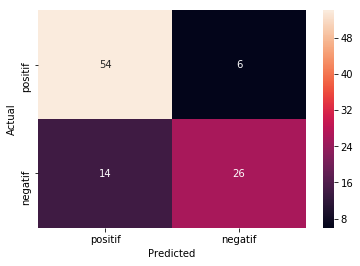

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.79      0.90      0.84        60
    negatif       0.81      0.65      0.72        40

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
Fold  10
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 

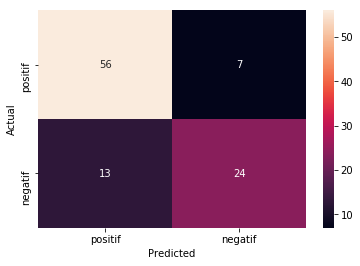

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.89      0.85        63
    negatif       0.77      0.65      0.71        37

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
shape x_train : (900, 2940)
shape x_test : (100, 2940)


In [6]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=5)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 32

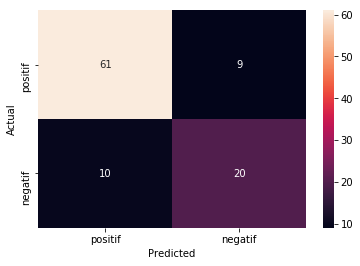

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.86      0.87      0.87        70
    negatif       0.69      0.67      0.68        30

avg / total       0.81      0.81      0.81       100

Akurasi Model 81.0 %
##########
Fold  2
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 2

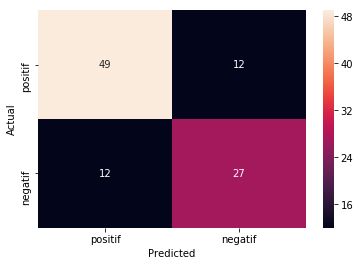

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.80      0.80      0.80        61
    negatif       0.69      0.69      0.69        39

avg / total       0.76      0.76      0.76       100

Akurasi Model 76.0 %
##########
Fold  3
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

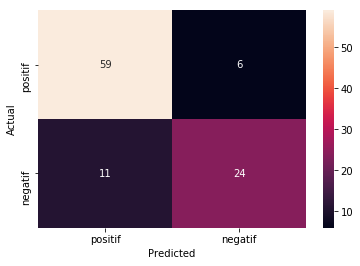

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.91      0.87        65
    negatif       0.80      0.69      0.74        35

avg / total       0.83      0.83      0.83       100

Akurasi Model 83.0 %
##########
Fold  4
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

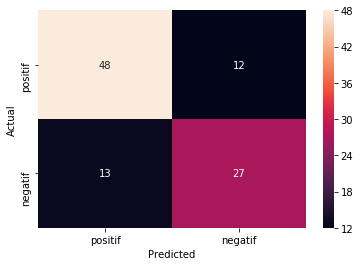

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.79      0.80      0.79        60
    negatif       0.69      0.68      0.68        40

avg / total       0.75      0.75      0.75       100

Akurasi Model 75.0 %
##########
Fold  5
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

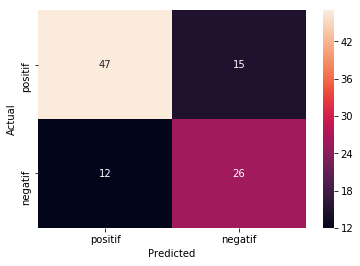

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.80      0.76      0.78        62
    negatif       0.63      0.68      0.66        38

avg / total       0.73      0.73      0.73       100

Akurasi Model 73.0 %
##########
Fold  6
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

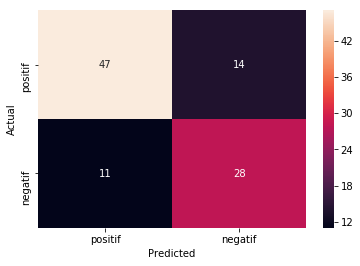

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.77      0.79        61
    negatif       0.67      0.72      0.69        39

avg / total       0.75      0.75      0.75       100

Akurasi Model 75.0 %
##########
Fold  7
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

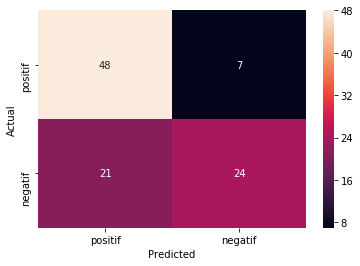

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.70      0.87      0.77        55
    negatif       0.77      0.53      0.63        45

avg / total       0.73      0.72      0.71       100

Akurasi Model 72.0 %
##########
Fold  8
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

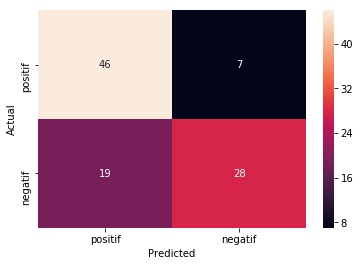

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.71      0.87      0.78        53
    negatif       0.80      0.60      0.68        47

avg / total       0.75      0.74      0.73       100

Akurasi Model 74.0 %
##########
Fold  9
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

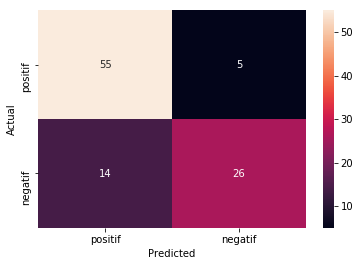

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.80      0.92      0.85        60
    negatif       0.84      0.65      0.73        40

avg / total       0.81      0.81      0.80       100

Akurasi Model 81.0 %
##########
Fold  10
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 

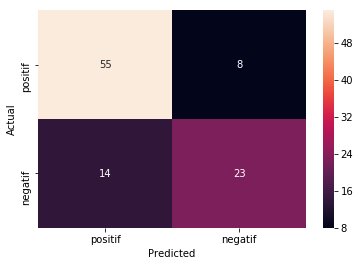

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.80      0.87      0.83        63
    negatif       0.74      0.62      0.68        37

avg / total       0.78      0.78      0.78       100

Akurasi Model 78.0 %
##########
shape x_train : (900, 2940)
shape x_test : (100, 2940)


In [7]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=7)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 32

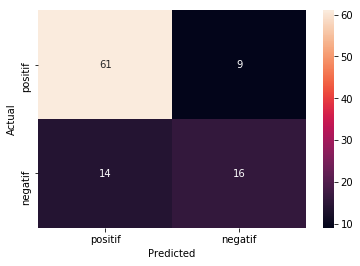

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.87      0.84        70
    negatif       0.64      0.53      0.58        30

avg / total       0.76      0.77      0.76       100

Akurasi Model 77.0 %
##########
Fold  2
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 2

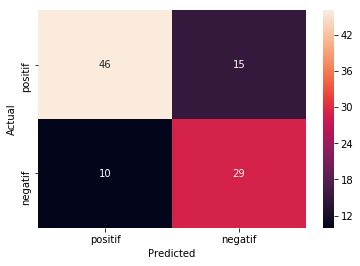

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.75      0.79        61
    negatif       0.66      0.74      0.70        39

avg / total       0.76      0.75      0.75       100

Akurasi Model 75.0 %
##########
Fold  3
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

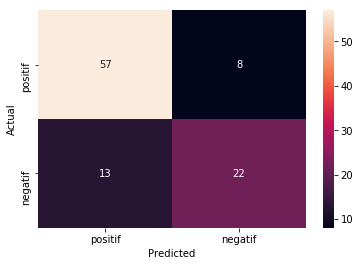

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.88      0.84        65
    negatif       0.73      0.63      0.68        35

avg / total       0.79      0.79      0.79       100

Akurasi Model 79.0 %
##########
Fold  4
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

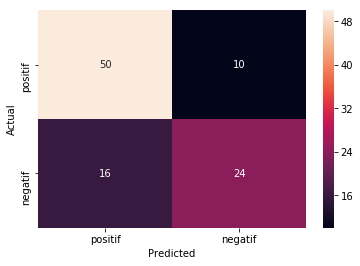

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.76      0.83      0.79        60
    negatif       0.71      0.60      0.65        40

avg / total       0.74      0.74      0.74       100

Akurasi Model 74.0 %
##########
Fold  5
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

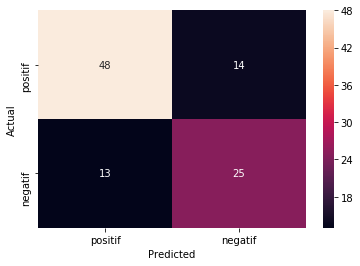

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.79      0.77      0.78        62
    negatif       0.64      0.66      0.65        38

avg / total       0.73      0.73      0.73       100

Akurasi Model 73.0 %
##########
Fold  6
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

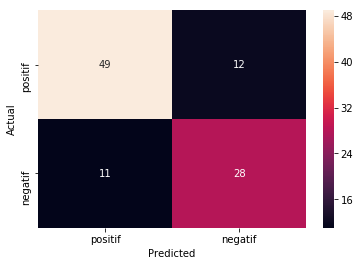

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.80      0.81        61
    negatif       0.70      0.72      0.71        39

avg / total       0.77      0.77      0.77       100

Akurasi Model 77.0 %
##########
Fold  7
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

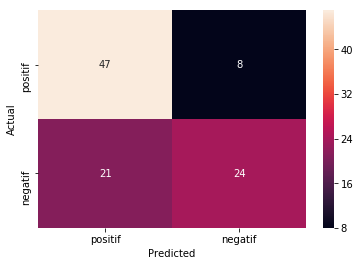

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.69      0.85      0.76        55
    negatif       0.75      0.53      0.62        45

avg / total       0.72      0.71      0.70       100

Akurasi Model 71.0 %
##########
Fold  8
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

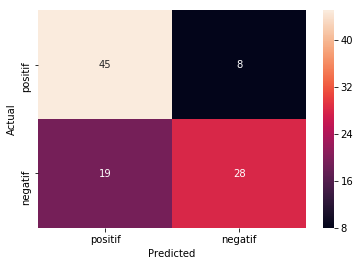

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.70      0.85      0.77        53
    negatif       0.78      0.60      0.67        47

avg / total       0.74      0.73      0.72       100

Akurasi Model 73.0 %
##########
Fold  9
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 1

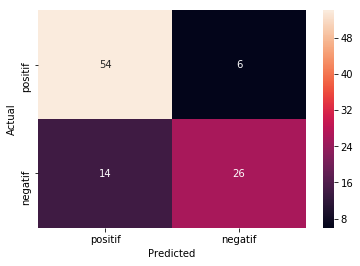

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.79      0.90      0.84        60
    negatif       0.81      0.65      0.72        40

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
Fold  10
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 

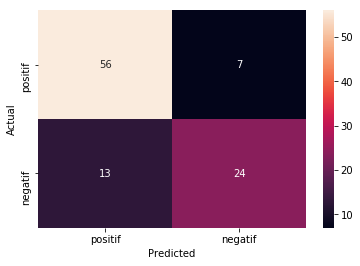

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.81      0.89      0.85        63
    negatif       0.77      0.65      0.71        37

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
shape x_train : (900, 2940)
shape x_test : (100, 2940)


In [8]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=5)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 32

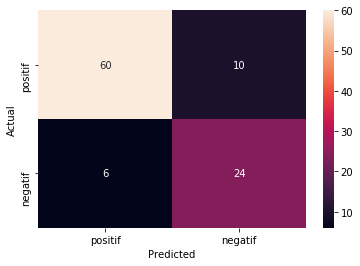

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.91      0.86      0.88        70
    negatif       0.71      0.80      0.75        30

avg / total       0.85      0.84      0.84       100

Akurasi Model 84.0 %
##########
Fold  2
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

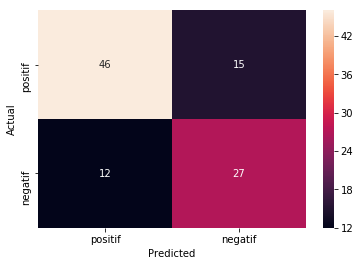

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.79      0.75      0.77        61
    negatif       0.64      0.69      0.67        39

avg / total       0.73      0.73      0.73       100

Akurasi Model 73.0 %
##########
Fold  3
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

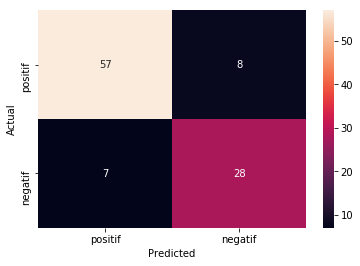

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.89      0.88      0.88        65
    negatif       0.78      0.80      0.79        35

avg / total       0.85      0.85      0.85       100

Akurasi Model 85.0 %
##########
Fold  4
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

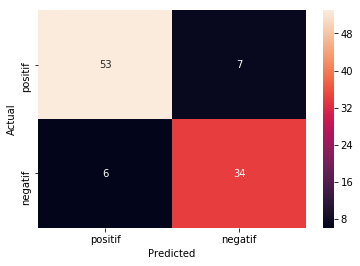

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.90      0.88      0.89        60
    negatif       0.83      0.85      0.84        40

avg / total       0.87      0.87      0.87       100

Akurasi Model 87.0 %
##########
Fold  5
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

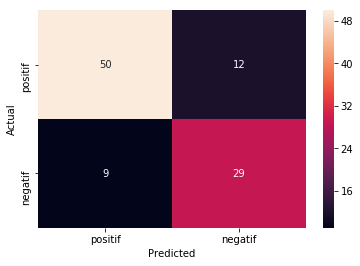

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.85      0.81      0.83        62
    negatif       0.71      0.76      0.73        38

avg / total       0.79      0.79      0.79       100

Akurasi Model 79.0 %
##########
Fold  6
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

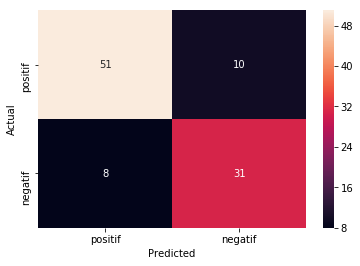

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.86      0.84      0.85        61
    negatif       0.76      0.79      0.77        39

avg / total       0.82      0.82      0.82       100

Akurasi Model 82.0 %
##########
Fold  7
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

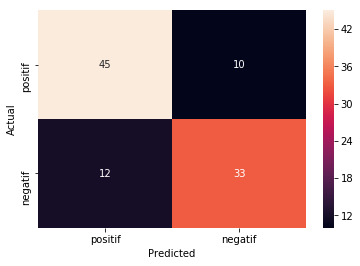

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.79      0.82      0.80        55
    negatif       0.77      0.73      0.75        45

avg / total       0.78      0.78      0.78       100

Akurasi Model 78.0 %
##########
Fold  8
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

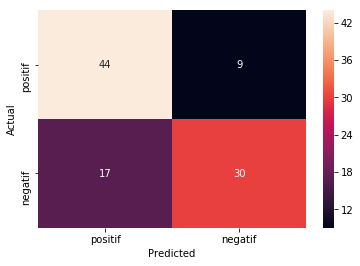

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.72      0.83      0.77        53
    negatif       0.77      0.64      0.70        47

avg / total       0.74      0.74      0.74       100

Akurasi Model 74.0 %
##########
Fold  9
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  

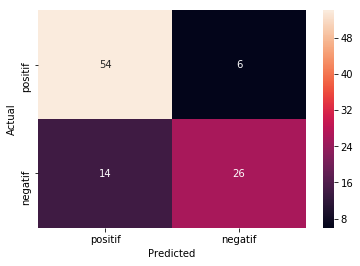

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.79      0.90      0.84        60
    negatif       0.81      0.65      0.72        40

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
Fold  10
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64 

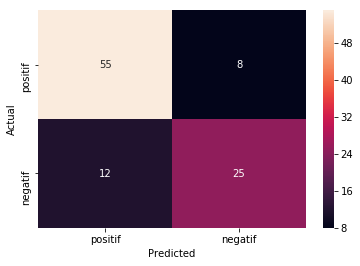

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.82      0.87      0.85        63
    negatif       0.76      0.68      0.71        37

avg / total       0.80      0.80      0.80       100

Akurasi Model 80.0 %
##########
shape x_train : (900, 2940)
shape x_test : (100, 2940)


In [6]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average
from sklearn.ensemble import RandomForestClassifier

#svm = SVC(kernel='linear', C=5)
#svm = KNeighborsClassifier(n_neighbors=7)
clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    clf_rf.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, clf_rf.predict(x_test)
    y_pred = clf_rf.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = clf_rf.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


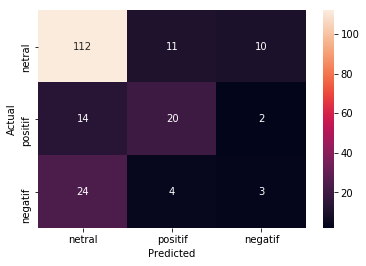

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

      netral       0.75      0.84      0.79       133
     positif       0.57      0.56      0.56        36
     negatif       0.20      0.10      0.13        31

    accuracy                           0.68       200
   macro avg       0.51      0.50      0.50       200
weighted avg       0.63      0.68      0.65       200

Akurasi Model 67.5 %
Komponen training set = Counter({1: 499, 2: 170, 3: 131})
Komponen testing set = Counter({1: 133, 2: 36, 3: 31})


In [5]:
# klasifikasi 5-NN

# Tranning
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=5, shuffle=True)
Model = KNeighborsClassifier(n_neighbors=5)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)

# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

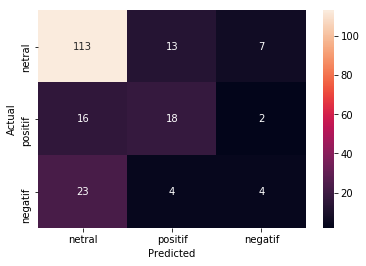

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

      netral       0.74      0.85      0.79       133
     positif       0.51      0.50      0.51        36
     negatif       0.31      0.13      0.18        31

    accuracy                           0.68       200
   macro avg       0.52      0.49      0.49       200
weighted avg       0.63      0.68      0.65       200

Akurasi Model 67.5 %
Komponen training set = Counter({1: 499, 2: 170, 3: 131})
Komponen testing set = Counter({1: 133, 2: 36, 3: 31})


In [6]:
#klasifikasi 7-NN

Model = KNeighborsClassifier(n_neighbors=7)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)


# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

In [37]:
#training random forest

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.1, random_state=0, shuffle=False)


# clf_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
# clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100, max_features='auto')
clf_rf.fit(X_train, y_train)



print (X_train.shape)
print (X_test.shape)

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))


(900, 2940)
(100, 2940)
Komponen training set = Counter({1: 547, 2: 353})
Komponen testing set = Counter({1: 63, 2: 37})


In [39]:
#cetak tree ke N

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydotplus

estimator = clf_rf.estimators_[15]

dot_data = StringIO()
export_graphviz (estimator, out_file='hasil.dot',
                  class_names=category_id.category.values,
                rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'hasil.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


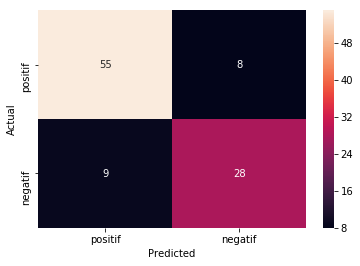

             precision    recall  f1-score   support

          1       0.86      0.87      0.87        63
          2       0.78      0.76      0.77        37

avg / total       0.83      0.83      0.83       100

Akurasi Model 83.0 %


In [38]:
#testing random forest

#y_pred = clf_dt.predict(X_test)

y_pred = clf_rf.predict(X_test)


# Confusion Matrix
conf_matr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(classification_report(y_test, y_pred))
print('Akurasi Model', round(metrics.accuracy_score(y_test, y_pred) * 100, 2), '%')
